In [32]:
import networkx as nx

### Implementation of feasibility check for max-flow problem with lower bounds

In [57]:
G = nx.DiGraph()

In [58]:
nodes = ['s', 'a', 'b', 't']

In [59]:
G.add_nodes_from(nodes)

In [60]:
G.nodes()

NodeView(('s', 'a', 'b', 't'))

In [61]:
G.edges()

OutEdgeView([])

In [62]:
G.add_edge('s', 'a', lb=3, ub=15)

In [63]:
G.add_edge('a','b', lb=4, ub=5)
G.add_edge('s','b', lb=4, ub=9)
G.add_edge('b','t', lb=7, ub=12)
G.add_edge('a','t', lb=8, ub=20)

In [64]:

pos=nx.nx_agraph.graphviz_layout(G,prog='neato')

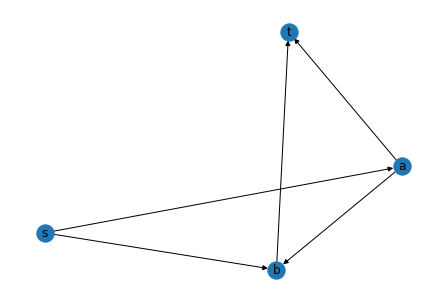

In [65]:
nx.draw(G, pos)
nx.draw_networkx_labels(G,pos);

In [66]:
G.edges(data=True)

OutEdgeDataView([('s', 'a', {'lb': 3, 'ub': 15}), ('s', 'b', {'lb': 4, 'ub': 9}), ('a', 'b', {'lb': 4, 'ub': 5}), ('a', 't', {'lb': 8, 'ub': 20}), ('b', 't', {'lb': 7, 'ub': 12})])

In [67]:
H = G.copy()

In this step I scale the capacities

In [68]:
for i,j in H.edges():
    capacity = G[i][j]['ub'] - G[i][j]['lb']
    H[i][j]['capacity'] = capacity
 

In [69]:
H.add_edge('t','s')

In [70]:
H.edges(data=True)

OutEdgeDataView([('s', 'a', {'lb': 3, 'ub': 15, 'capacity': 12}), ('s', 'b', {'lb': 4, 'ub': 9, 'capacity': 5}), ('a', 'b', {'lb': 4, 'ub': 5, 'capacity': 1}), ('a', 't', {'lb': 8, 'ub': 20, 'capacity': 12}), ('b', 't', {'lb': 7, 'ub': 12, 'capacity': 5}), ('t', 's', {})])

In [71]:
b = dict()

In [72]:
for i in G.nodes():
    aux = 0
    
    for h,k in G.in_edges(i):
        aux += G[h][k]['lb']
        
    for h,k in G.out_edges(i):
        aux -= G[h][k]['lb']
        
    
    b[i] = aux
    

In [73]:
b

{'s': -7, 'a': -9, 'b': 1, 't': 15}

In [21]:
H.add_node('s1')
H.add_node('t1')

In [74]:
for n, cap in b.items():
    if cap < 0:
        H.add_edge(n, 't1', capacity=-cap)
    if cap > 0:
        H.add_edge ('s1', n, capacity=cap)


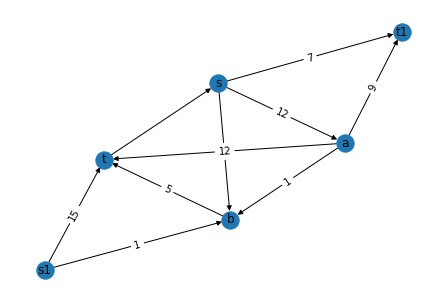

In [75]:
labels = nx.get_edge_attributes(H, 'capacity')

pos=nx.nx_agraph.graphviz_layout(H,prog='neato')

nx.draw(H, pos, with_labels=True)
nx.draw_networkx_edge_labels(H, pos, labels);



In [76]:
H.edges(data=True)

OutEdgeDataView([('s', 'a', {'lb': 3, 'ub': 15, 'capacity': 12}), ('s', 'b', {'lb': 4, 'ub': 9, 'capacity': 5}), ('s', 't1', {'capacity': 7}), ('a', 'b', {'lb': 4, 'ub': 5, 'capacity': 1}), ('a', 't', {'lb': 8, 'ub': 20, 'capacity': 12}), ('a', 't1', {'capacity': 9}), ('b', 't', {'lb': 7, 'ub': 12, 'capacity': 5}), ('t', 's', {}), ('s1', 'b', {'capacity': 1}), ('s1', 't', {'capacity': 15})])

In [77]:
value, flow = nx.maximum_flow(H, 's1', 't1')

In [78]:
value

16

In [79]:
flow

{'s': {'a': 9, 'b': 0, 't1': 7},
 'a': {'b': 0, 't': 0, 't1': 9},
 'b': {'t': 1},
 't': {'s': 16},
 't1': {},
 's1': {'b': 1, 't': 15}}

In [80]:
mincut, cut = nx.minimum_cut(H, 's1','t1')

In [81]:
mincut

16

In [82]:
cut[0]

{'a', 'b', 's', 's1', 't'}

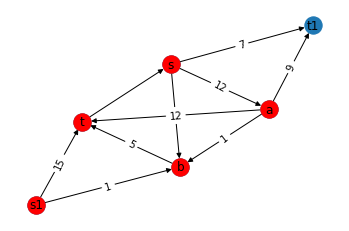

In [83]:
nx.draw_networkx_edge_labels(H, pos, labels);
nx.draw(H, pos, with_labels=True)
nx.draw_networkx_nodes(H, pos, cut[0], node_color='red')


